## Import modules

In [ ]:
import pandas as pd
import re

## Set display options

In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

import warnings
warnings.filterwarnings('ignore')

## Load data

In [ ]:
url = "https://drive.google.com/file/d/1N2BR7RENmubj7E7nBn6k6XEE8hPDtlcV/view?usp=share_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

## Get sorted list of n most common types

In [ ]:
n = 30
top_types = products.groupby("type", as_index=False).count().nlargest(n, "sku")["type"].to_list()

## Display products of each type to determine category

In [ ]:
idx = 24
print(f"Type: {top_types[idx]}, Count: {products.loc[products['type'] == top_types[idx], 'sku'].count()}")
products.loc[products["type"] == top_types[idx]].sample(50)

Type: 2449, Count: 107


,sku,name,desc,price,in_stock,type,category,state,price category
6752,NOM0023,Nomad Horween Leather Strap Leather strap brown 42mm Apple Watch / Silver,Brown leather belt with silver buckle for 42mm Apple Watch,59.95,0,2449,Accessories,New,Low
10266,APP2614,Correa Apple Nike Sport 42mm Pure Platinum / Black,Nike belt shrunk for Apple Watch 42mm,59.00,0,2449,Accessories,New,Low
7149,HOC0011,Nike hoco Series Apple Watch Strap 38mm White / Yellow,Sports belt silicone strap for Apple Watch 38mm,45.00,1,2449,Accessories,New,Low
5615,APP1804,Apple Classic buckle strap 42mm Blue Sea,Apple strap classic design with calfskin tone for Apple Watch 38 mm,159.00,0,2449,Accessories,New,Medium
10413,HOC0029,Hoco Grand Series 38mm Apple Watch metal Strap Rose Gold,Stainless steel strap Hoco for Apple Watch 38mm.,65.99,1,2449,Accessories,New,Low
3627,BAN0007,Panama Band & Strap Watch Strap Black 42mm Apple,Leather strap for easy installation Apple Watch 42mm.,59.00,0,2449,Accessories,New,Low
8257,ICA0083,Incase Leather Strap Band Apple Watch 38mm brown,Genuine leather strap with stainless steel buckle Apple Watch 38 mm,59.95,0,2449,Accessories,New,Low
7147,HOC0009,Nike hoco Series Apple Watch Strap 38mm Black / Yellow,Silicone Strap Sports Watch 38mm Apple,45.00,0,2449,Accessories,New,Low
7931,APP2116,Apple Nike Sport Strap 42mm Obsidian / Black,Durable and flexible strap sports with clip closure Apple Watch 42 mm,59.00,1,2449,Accessories,New,Low
10069,APP2598,Apple 38mm Belt Loop Deportiva Náåácar,Durable and flexible strap sports lockable clip Apple Watch 38mm,59.00,0,2449,Accessories,New,Low


## Categorize types

In [ ]:
# 1. Accessories
accessories = ['11865403', '1298', '12635403', '13835403', '12585395', '1325', '2449', '13615399', '13555403', '1229', '1515', ]

# 2. Hard drives
hard_drives = ['11935397', '1364', '1433', '12215397', '12655397', '57445397']

# 3. Computers
computers = ['1282', '5,74E+15', '1,02E+12', '2158']

# 4. Internet
internet = ['12175397', '1334', '12995397']

# 5. Repair services
repair_services = ['1,44E+11']

# 6. Gadgets
gadgets = ['11905404']

# 7. Tablets
tablets = ['1405']

# 8. Monitors
monitors = ['1296']

# 9. Audio
audio = ['5384', '5398']



## Extra categories
# 11. iPhones
iphone_regex = re.compile(r"Apple iPhone .{1,2} .*", flags=re.IGNORECASE)
iphones = products.loc[products.name.str.contains(iphone_regex, regex=True), "type"].unique().tolist()

# iPads --> goes into tablets
ipad_regex = re.compile(r"^(?!.*\b(Case|Cover)\b)(?=.*\bApple iPad\b).+$", flags=re.IGNORECASE)
ipads = products.loc[products.name.str.contains(ipad_regex, regex=True), "type"].unique().tolist()
tablets += ipads 

# Keyboards and Mice
keyboard_mice_regex = re.compile(r".*(keyboard|mouse).*", flags=re.IGNORECASE)
keyboard_mice = products.loc[products.name.str.contains(keyboard_mice_regex, regex=True), "type"].unique().tolist()
accessories += keyboard_mice


['11865403',
 '1298',
 '12635403',
 '13835403',
 '12585395',
 '1325',
 '57445397',
 '2449',
 '13615399',
 '13555403',
 '13855401',
 '1387',
 '12355400',
 '8696',
 '12575403',
 '13835403',
 '54025401',
 '1298',
 '12635403',
 '13005399',
 '11865403',
 '1282',
 '5403',
 '5401',
 '9,29E+11']

## Add categories to products data frame

In [ ]:
products["category"] = ""

products.loc[products["type"].isin(accessories), "category"] = "Accessories"
products.loc[products["type"].isin(hard_drives), "category"] = "Hard drives"
products.loc[products["type"].isin(computers), "category"] = "Computers"
products.loc[products["type"].isin(internet), "category"] = "Internet"
products.loc[products["type"].isin(repair_services), "category"] = "Repair services"
products.loc[products["type"].isin(gadgets), "category"] = "Gadgets"
products.loc[products["type"].isin(tablets), "category"] = "Tablets"
products.loc[products["type"].isin(monitors), "category"] = "Monitors"
products.loc[products["type"].isin(audio), "category"] = "Audio"
products.loc[products["type"].isin(iphones), "category"] = "iPhones"

products.loc[products["category"] == "", "category"] = "Other"

products["category"].value_counts()


iPhones        2119
Accessories    1642
Other          1614
Internet       1318
Hard drives    1287
Computers       887
Gadgets         580
Tablets         501
Audio           341
Monitors        188
Name: category, dtype: int64

## Create recycling categories


In [ ]:
products["state"] = "New"

recycling_regex = re.compile(r"^(?=.*\b(Open|Like new|refurbished|reconditioned|second hand)\b).+$", flags=re.IGNORECASE)
products.loc[products.name.str.contains(recycling_regex, regex=True) | products.desc.str.contains(recycling_regex, regex=True), "state"] = "Refurbished"

products["state"].value_counts()

New            8798
Refurbished    1679
Name: state, dtype: int64

## Create price categories


In [ ]:
products["price category"] = pd.cut(products.price, [0, 100, 1000, 20000], labels=["Low", "Medium", "High"])

products["price category"].value_counts()

Low       5246
Medium    3354
High      1877
Name: price category, dtype: int64

## Plot pie charts

<Axes: >

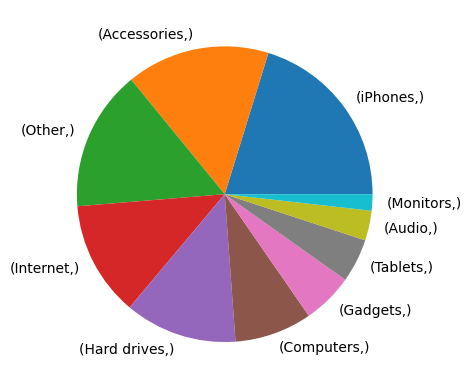

In [ ]:
# Product categories
cat_counts = products[["category"]].value_counts()
cat_counts.plot.pie()

<Axes: >

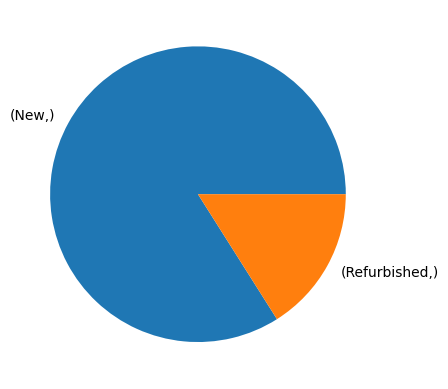

In [ ]:
# State
state_counts = products[["state"]].value_counts()
state_counts.plot.pie()

<Axes: >

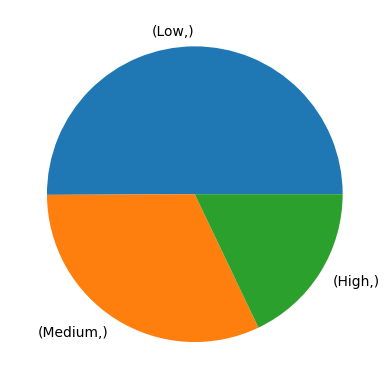

In [ ]:
# Price categories
price_counts = products[["price category"]].value_counts()
price_counts.plot.pie()

Business questions

* What is the distribution of product prices across different categories?

* How many products are being discounted?

* How big are the offered discounts as a percentage of the product prices?

* How do seasonality and special dates (Christmas, Black Friday) affect sales?

* How could data collection be improved?